# House Price Prediction using Linear Regression

1. Here I'm Creating a Machine Learning Model (Specifically using Linear Regression) to predict the house prices in Bengaluru, the capital city of Karnataka.

2. I'm going to use the dataset called "Bangalore house price" from kaggle.com

3. Here I'll use some bunch of Data Science concepts to build predictive model. So, I'll mention each concepts along with code.

So Let's Start this Model Bulding Journey!!

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10) # width, height in inches
import io

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

### Step 2: Dataset Loading

In [3]:
df1 = pd.read_csv(r"C:\Users\HI\Downloads\banglore.csv")

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Step 3: Exploratory Data Distribution and Analysis

In [5]:
#used to get the no of rows and colunms
df1.shape

(13320, 9)

In [6]:
#used to get all the column names
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
# used to check the unique values "area_type" column
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
#Used to get the count of trianing examples for each area type
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
#Let get the count of trianing examples for each area type
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

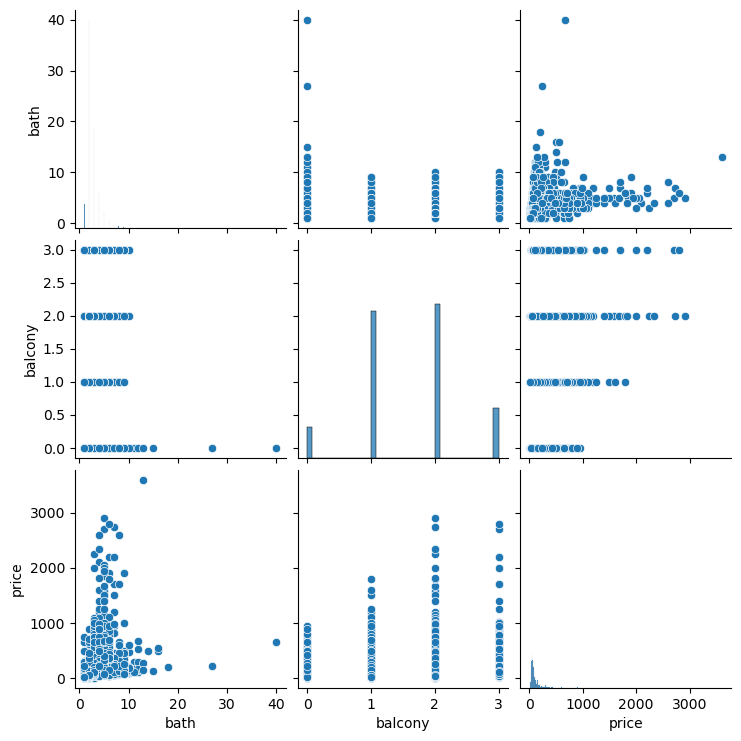

In [10]:
sns.pairplot(df1)

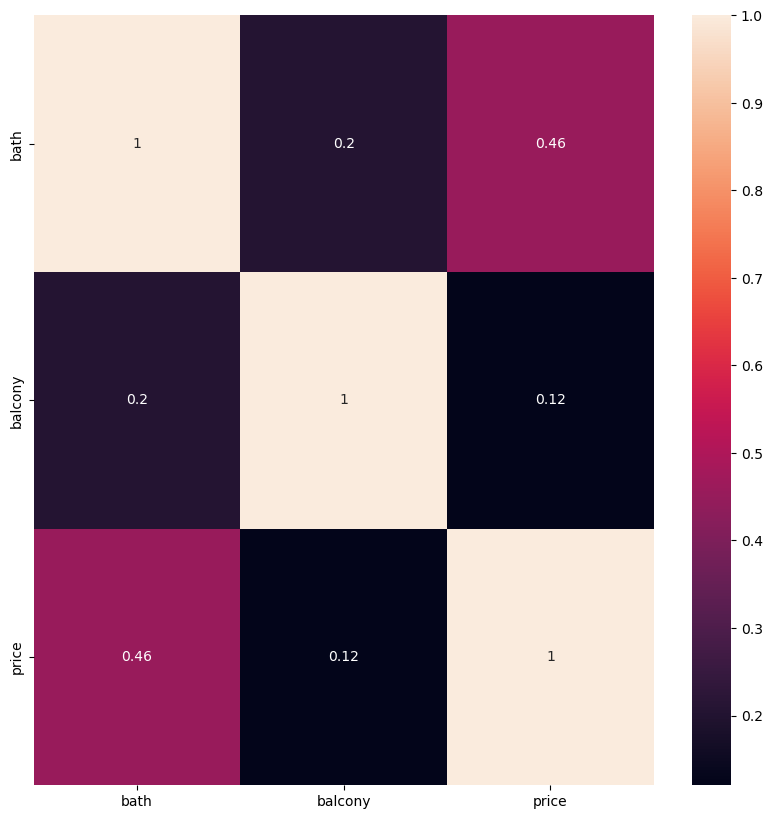

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Step 4: Data Cleaning

In [12]:
# Note everytime we make change in dataset we store it in new dataframe
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'],axis='columns')

print('Rows and columns are = ', df2.shape)
df2.head()

Rows and columns are =  (13320, 5)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
#To get the sum of all not available or missing values from dataset
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
#to remove any wors with missing values from df1
df3 = df2.dropna()

#to get the sum of missing values from new df2
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
# To find the shape of new dataframe df2 after removing all the null values in dataset
df3.shape

(13246, 5)

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Step 5: Feature Engineering

In [17]:
df4 = df3.copy()

# Using lambda function we can get the BHK numeric value
df4['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

#This line is checking the unique values in the 'bhk' column of the  df3
df4.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
#Get the training examples with home size more than 20 BHK
df4[df4.bhk >20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


#### Explore Total Sqft Feature

In [19]:
def is_float(x):
  try:
    float(x)
  except:
    return False

  return True

In [20]:
# Test the function
print('is this (123) float value = %s' % (is_float(123)))
print(f'is this (1133 - 1384) float value = {is_float("1133 - 1384")}')

is this (123) float value = True
is this (1133 - 1384) float value = False


In [21]:
#Lets apply this function to 'total_sqft' column

#Showing training examples where 'total_sqft' vale is not float
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770
648,Arekere,9 Bedroom,4125Perch,9.0,265.000
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000


#### Above data shows that total sqft can be a range (e.g. 2100 - 2850). for such cases we can just take average of min and max value in the range. There are other cases where are in sqm which can be converted to sqft using unit conversion.

In [22]:
def convert_range_to_sqft(x):
  try:
    tokens = x.split('-')

    if len(tokens) == 2:
      return (float(tokens[0]) + float(tokens[1]))/2
    else:
      return float(x)
  except:
    return None

In [23]:
#Lets test the convert_range_to_sqft()
print('Return value for i/p 12345 = %s' % (convert_range_to_sqft('12345')))
print('Return value for i/p 1133 - 1384 = %s' % (convert_range_to_sqft('1133 - 1384')))
print('Return value for i/p 34.46Sq. Meter = %s' % (convert_range_to_sqft('34.46Sq. Meter')))

Return value for i/p 12345 = 12345.0
Return value for i/p 1133 - 1384 = 1258.5
Return value for i/p 34.46Sq. Meter = None


In [24]:
# Lets apply this function for total_sqft column
df5 = df4.copy()

df5.total_sqft = df4.total_sqft.apply(convert_range_to_sqft)
df5 = df5[df5.total_sqft.notnull()]
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
# Since our converion function will return null for values like 34.46Sq. Meter. Lets check for any null values in it
df5.total_sqft.isnull().sum()

0

#### For row below, it shows total sqft as 2475 which is an average of the range 2100-2850

In [26]:
df5.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [27]:
# Lets cross check the values of 'total_sqft'
print('total_sqft value for 30th training set in df4 = %s' % (df3.total_sqft[30]))
print('total_sqft value for 30th training set in df6 = %s' % (df6.total_sqft[30]))

total_sqft value for 30th training set in df4 = 2100 - 2850


NameError: name 'df6' is not defined

### Add new feature called Price Per Square Feet

In [ ]:
df7 = df6.copy()

df7['price_per_sqft'] = (df6['price'] * 100000)/df6['total_sqft']
df7.head()

In [ ]:
df7_stats = df7['price_per_sqft'].describe()
df7_stats

In [ ]:
df7.to_csv("bhp.csv",index=False)

#### Examine locations which is a categorical variable. We need to apply the dimensionality reduction techinique here to reduce the number of Locations.

In [ ]:
#Trim the location values
df7.location = df7.location.apply(lambda x: x.strip())
df7.head()

In [ ]:
#Lets get the count of each location
location_stats = df7.location.value_counts(ascending=False)
location_stats

In [ ]:
#Total number unique location categories are
location_stats.values.sum()

In [ ]:
len(location_stats)

In [ ]:
#Get total number of categories where data points are less than 10
print('Total no of locations where data points are more than 10 = %s' % (len(location_stats[location_stats > 10])))
print('Total no of locations where data points are less than 10 = %s' % (len(location_stats[location_stats <= 10])))

### Step 6: Dimensionality Reductions

Any location having less than 10 data pints should be tagged as "other" location. This was number of categories can be reduced by huge amount. later on when wedo one hot encoding, it will help us with having fewer cummy columns.

In [ ]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

In [ ]:
len (df7.location.unique())

In [ ]:
#Using lambda function assign the 'other' type to every element in 'location_stats_less_than_10'
df8 = df7.copy()

df8.location = df7.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
len(df8.location.unique())

In [ ]:
df8.head(10)

### Step 7a: Outlier Dectection and removal using Business Logic

As a Data Scientist a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 ( i.e 2 BHK apartment is minimum 600 sqft. if you have for example 400 sqft apartment with 2BHK than that seems suspicious and can be removed as an outilier. we will remove suhc outliers by keeping our minimum thresold per BHK to be 300 sqft

In [ ]:
# Lets visualize the data where square fit per bedroom is less than 300
df8[(df8.total_sqft / df8.bhk) < 300]

Check the above data points. We have 6 BHK apartments with 1020 sqft. Another one is 8 BHK and the total sqft is 600. These are clear data errors that can be removed safely

In [ ]:
df8.shape

In [ ]:
df9 = df8[~((df8.total_sqft / df8.bhk) < 300)]
df9.shape

### Step 7b: Outlier Removal using Standard Deviation and Mean

In [ ]:
df9.price_per_sqft.describe()

In [ ]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar'
# Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here
plt.hist(df9[df9.location == "Rajaji Nagar"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Here we find that min price per sqft is 267rs/sqft whereaf max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation.

In [ ]:
# Function to remove outliers using pps(price per sqft)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean + std))] # 1 Sigma value i.e 68% of data
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) # Storing data in 'df_out' dataframe
    return df_out

df10 = remove_pps_outliers(df9)
df10.shape

In [ ]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar' after outlier removal
plt.hist(df10[df10.location == "Rajaji Nagar"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Let's check if for a given location how does the 2 BHK and 3 BHK propery prices look like.

In [ ]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df10,"Rajaji Nagar")

In [ ]:
plot_scatter_chart(df10,"Hebbal")

We should also remove propertiese where for the same location, The price of (for example) a 3 bedroom apartment is less than a 2 bedroom apartment (with the same square ft area). What we will do is for a given location, we will build a dictionary of stats per BHK, i.e.

In [ ]:
'''{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}'''

#### Now we can remove those 2 BHK apartment whose price_per_sqft is less than the mean price_per_sqft of 1 BHK apartment.

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df11 = remove_bhk_outliers(df10)
df11.shape

In [ ]:
#Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties
plot_scatter_chart(df11,"Rajaji Nagar")

In [ ]:
plot_scatter_chart(df11,"Hebbal")

In [ ]:
#Now lets plot the histogram and visualize the price_per_sqft data after outlier removal

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df11.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Step 7c: Outlier Removal using Bathrooms Features

In [ ]:
#Get unique bath from dataset
df11.bath.unique()

In [ ]:
plt.hist(df11.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>10]

In [ ]:
#Get the training examples where no of bath are more than (no of BHK +2)
df11[df11.bath > df11.bhk + 2]

In [ ]:
# Remove the outliers with more than (no of BHK + 2) bathrooms
df12 = df11[df11.bath < (df11.bhk + 2)]
df12.shape

In [ ]:
df13 = df11.drop(['size', 'price_per_sqft'], axis='columns')
df13.head()

#### Use one hot encoding for location

In [ ]:
dummies = pd.get_dummies(df13.location)
dummies.head()

In [ ]:
#To avoid dummy variable trap problem lets delete the one of the dummy variable column
dummies = dummies.drop(['other'],axis='columns')
dummies.head()

In [ ]:
#Now lets add dummies dataframe to original dataframe
df14 = pd.concat([df13,dummies],axis='columns')
df14.head()

In [ ]:
#Lets delete the location feature
df15 = df14.drop(['location'],axis='columns')
df15.head()

### Step 8: Building A Model

In [ ]:
#Final shape of our dataset is
df15.shape

In [ ]:
X = df15.drop(['price'],axis='columns')
X.head()

In [ ]:
y = df15.price
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

### Use K-Fold Cross Validation to measure accuracy of our Linear Regression Model.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit is used to randomize the each fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for Regression to see if we can get an even better score. we will use GridsearchCv for this purpose.

### Find Best Model using GridsearchCv

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    # Define the algorithms and their respective hyperparameters
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['friedman_mse', 'squared_error'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

#### Based on the above results we can say that Linear Regression gives the best score. Hence we will use that only.

### Step 9: Test the Model for few properties

In [ ]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

In [ ]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

In [ ]:
predict_price('Indira Nagar',1000, 2, 2)

In [ ]:
predict_price('Indira Nagar',1000, 3, 3)

### Export the Tested Model to a pickle file.

In [ ]:
import pickle

with open("C:\\Users\\HI\\Downloads\\Bengaluru_House_Price_Prediction_Model.pickle", 'wb') as f:
    pickle.dump(lr_clf, f)